# YT Data Analysis

**Project Overview**

The project is based on data of Samsung channel (downloaded 2025-12-18), obtained from YouTube via API.
This project can be used by marketing team for the following purposes:
- Learning about competitors' channels, their content and publishing strategies
- Collecting historical data on competitors YT channels and performing analysis
- Figuring out content patterns and key topics on the channel
- Comparing channel between each other (by choosing other channels and downloading their data)

**프로젝트 개요**

본 프로젝트는 YouTube API를 통해 수집한 삼성(Samsung) 채널의 데이터(2025-12-18 다운로드 기준)를 기반으로 합니다. 마케팅 팀은 해당 프로젝트를 통해 수집한 데이터로 다음과 같은 목적에 활용할 수 있습니다.

- 경쟁사 채널과 콘텐츠 및 운영 전략을 파악
- 경쟁사 YouTube 채널의 데이터를 반복적으로 수집해서 분석 수행
- 콘텐츠 패턴과 핵심 주제를 도출
- 다른 채널을 선택해 데이터를 다운로드함으로써 채널 간 비교 분석

**Project Objective**
- Learning about Samsung YouTube channel statistics
- Figuring out when the content is published
- Finding best- and worst-performing videos of all times and in particular year
- Visualizing most-frequently used words in video titles, tags and descriptions

**프로젝트 목표**

- 삼성 YouTube 채널 통계를 학습하여 현황을 파악
- 콘텐츠 게시 시기 분석
- 전체 기간 및 특정 연도 기준으로 가장 뷰가 많은 영상과 뷰가 적은 영상 식별
- 영상 제목, 태그, 설명에서 가장 자주 사용되는 단어를 시각화

In [1]:
#!pip install wordcloud
#!pip install isodate

In [2]:
#import libraries / 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import isodate
import textwrap
import re

import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [3]:
#formatting number to 2 decimal points / 숫자를 소수점 둘째 자리까지 포맷하기
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
stats = pd.read_csv('channel_stats.csv')

stats

,channelName,subscribers,views,totalVideos,playlistId,timestamp
0,Samsung,7690000,2842913664,2388,UUWwgaK7x0_FR1goeSRazfsQ,2025-12-18 15:39:31.462911


The data was downloaded on 2025-12-18. The number of subscribers at that point equaled 7.7 million with approximately 2.8 billion views

데이터는 2025년 12월 18일에 다운로드 되었습니다. 당시 구독자 수는 770만 명이었고, 조회수는 약 28억회였습니다.

# EDA

In [5]:
df = pd.read_csv('video.csv')

df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,_vn38bkAttU,Samsung,It's time | Galaxy Watch8 | Samsung,It’s time to jump into the holiday season with...,"['festive season', 'galaxy ai', 'galaxy watch ...",2025-12-17T10:01:04Z,23121,"1,041.00",NaN,47.00,PT17S,hd,False
1,4R4eHAiTwiU,Samsung,Illuminating Creativity in Miami Beach | Samsung,A new way to meet artists and art.\nArtists sh...,"['art basel', 'art gallery', 'art tv', 'best t...",2025-12-16T09:00:26Z,7955,219.00,NaN,3.00,PT1M,hd,False
2,clw2GF1nw54,Samsung,Crafting better ways to life I Bespoke AI Laun...,This video is an interview-style narrative cap...,NaN,2025-12-16T02:00:20Z,6667,350.00,NaN,34.00,PT4M11S,hd,False
3,OwRng3-Cmks,Samsung,Crafting better ways to life I Bespoke AI Refr...,This video is an interview-style narrative cap...,NaN,2025-12-16T01:00:36Z,4294,242.00,NaN,18.00,PT4M1S,hd,False
4,1n7IgawZ4zg,Samsung,Elevate Every Frame of Fallout Season Two | Sa...,Your journey through the Wasteland deserves th...,"['4k tv', '8k tv', 'AI TV', 'AI Technology', '...",2025-12-10T13:01:32Z,15686,592.00,NaN,56.00,PT1M29S,hd,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2388 entries, 0 to 2387
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   video_id        2388 non-null   object 
 1   channelTitle    2388 non-null   object 
 2   title           2388 non-null   object 
 3   description     2383 non-null   object 
 4   tags            2035 non-null   object 
 5   publishedAt     2388 non-null   object 
 6   viewCount       2388 non-null   int64  
 7   likeCount       2381 non-null   float64
 8   favouriteCount  0 non-null      float64
 9   commentCount    2378 non-null   float64
 10  duration        2388 non-null   object 
 11  definition      2388 non-null   object 
 12  caption         2388 non-null   bool   
dtypes: bool(1), float64(3), int64(1), object(8)
memory usage: 226.3+ KB


In [7]:
#removing the column with no data / 데이터가 없는 열 제거
df = df.drop('favouriteCount', axis=1)

In [8]:
df.describe()

,viewCount,likeCount,commentCount
count,"2,388.00","2,381.00","2,378.00"
mean,"1,190,788.06","4,208.99",180.08
std,"5,135,691.63","29,165.27",870.26
min,236.00,0.00,0.00
25%,"13,861.25",430.00,15.00
50%,"34,014.50",890.00,42.00
75%,"126,067.75","1,916.00",107.00
max,"84,020,226.00","1,152,833.00","30,265.00"


In [9]:
#checking for missing values / 결측값 확인
df.isnull().sum()

video_id          0
channelTitle      0
title             0
description       5
tags            353
publishedAt       0
viewCount         0
likeCount         7
commentCount     10
duration          0
definition        0
caption           0
dtype: int64

There is one column that contains no data. Also the following columns contain missing values: *description, tags, likeCount, commentCount*, however they do not seem to greatly affect the objectives of the analysis.

데이터가 전혀 없는 열이 하나 있습니다. 또한 *description, tags, likeCount, commentCount* 열에는 결측값이 포함되어 있으나, 분석목적에 큰 영향을 미치지는 않는 것으로 보입니다.

# Data Preprocessing

In [10]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

In [11]:
#adding a weekday / 요일 열을 추가
df['weekday'] = df['publishedAt'].apply(lambda x: x.strftime("%A")) 
df['weekday'].unique()

array(['Wednesday', 'Tuesday', 'Sunday', 'Friday', 'Monday', 'Saturday',
       'Thursday'], dtype=object)

In [12]:
#converting video duration to seconds / 비디오 재생 시간을 초 단위로 변환
df['duration_secs'] = df['duration'].apply(lambda x: isodate.parse_duration(x))
df['duration_secs'] = df['duration_secs'] / np.timedelta64(1, 's')

In [13]:
df['description'] = df['description'].fillna('no description')

In [14]:
#counting tags / 태그 수를 계산
df['tags'] = df['tags'].fillna('no tag')
df['tags_count'] = df['tags'].apply(lambda x: len(x.replace("'", "").replace("[", "").replace("]", "").split(",")))

In [15]:
#ratio of comments and likes per 1000 view / 조회수 1,000회당 댓글과 좋아요 비율
df['likeRatio'] = df['likeCount'] / df['viewCount'] * 1000
df['commentRatio'] = df['commentCount']/ df['viewCount'] * 1000

In [16]:
df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,definition,caption,weekday,duration_secs,tags_count,likeRatio,commentRatio
0,_vn38bkAttU,Samsung,It's time | Galaxy Watch8 | Samsung,It’s time to jump into the holiday season with...,"['festive season', 'galaxy ai', 'galaxy watch ...",2025-12-17 10:01:04+00:00,23121,"1,041.00",47.00,PT17S,hd,False,Wednesday,17.00,26,45.02,2.03
1,4R4eHAiTwiU,Samsung,Illuminating Creativity in Miami Beach | Samsung,A new way to meet artists and art.\nArtists sh...,"['art basel', 'art gallery', 'art tv', 'best t...",2025-12-16 09:00:26+00:00,7955,219.00,3.00,PT1M,hd,False,Tuesday,60.00,16,27.53,0.38
2,clw2GF1nw54,Samsung,Crafting better ways to life I Bespoke AI Laun...,This video is an interview-style narrative cap...,no tag,2025-12-16 02:00:20+00:00,6667,350.00,34.00,PT4M11S,hd,False,Tuesday,251.00,1,52.50,5.10
3,OwRng3-Cmks,Samsung,Crafting better ways to life I Bespoke AI Refr...,This video is an interview-style narrative cap...,no tag,2025-12-16 01:00:36+00:00,4294,242.00,18.00,PT4M1S,hd,False,Tuesday,241.00,1,56.36,4.19
4,1n7IgawZ4zg,Samsung,Elevate Every Frame of Fallout Season Two | Sa...,Your journey through the Wasteland deserves th...,"['4k tv', '8k tv', 'AI TV', 'AI Technology', '...",2025-12-10 13:01:32+00:00,15686,592.00,56.00,PT1M29S,hd,False,Wednesday,89.00,39,37.74,3.57


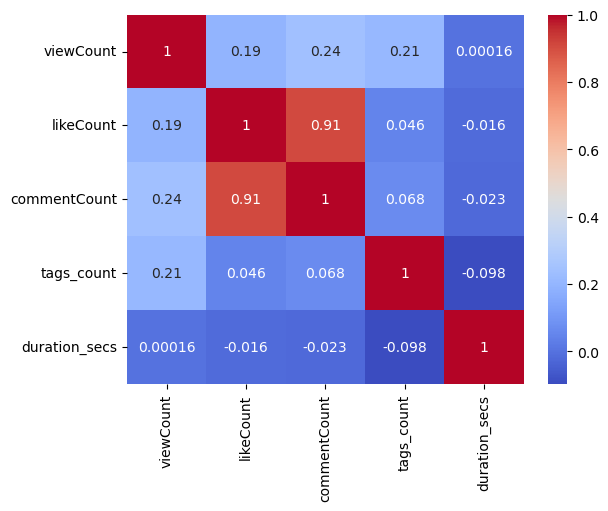

In [17]:
#correlation matrix / 상관관계 행렬
columns = ['viewCount', 'likeCount', 'commentCount', 'tags_count', 'duration_secs']
sns.heatmap(df[columns].corr(), annot=True, cmap='coolwarm');

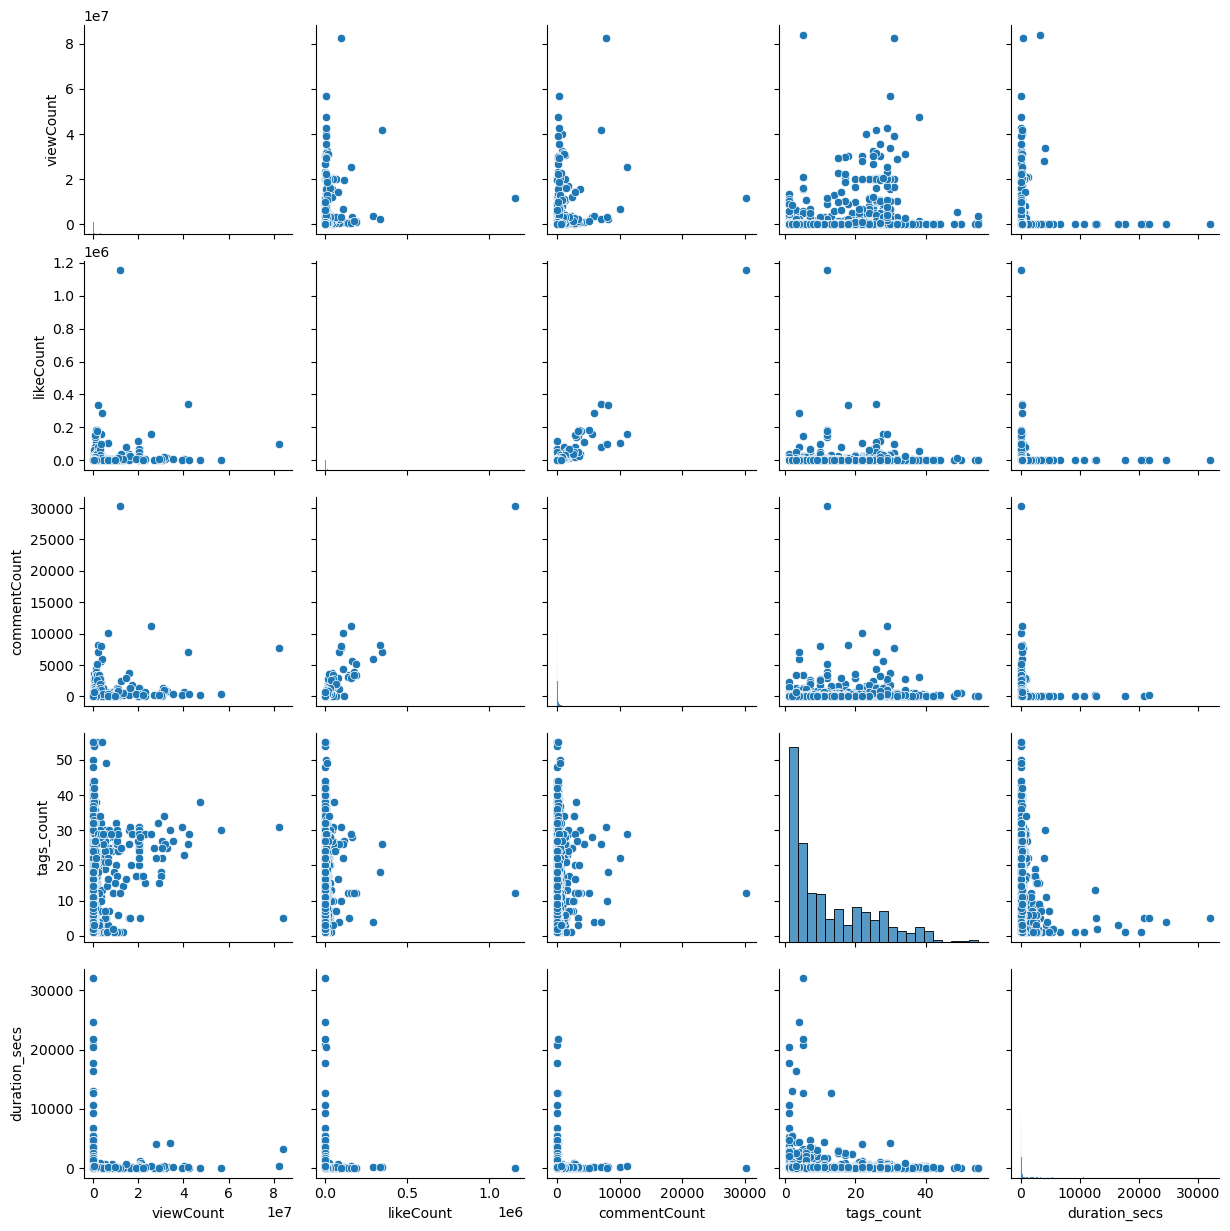

In [18]:
sns.pairplot(df[columns]);

There is a strong correlation (0.91) between like and comment count. So, the more likes the video has, the more comments are left below it and vice versa.

좋아요 수와 댓글 수 사이에는 강한 상관관계(0.91)가 있습니다. 즉, 동영상의 좋아요 수가 많을수록 댓글도 많이 달리며, 그 반대도 마찬가지입니다.

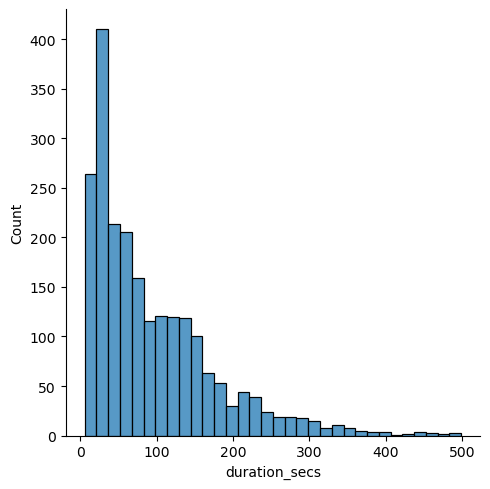

In [19]:
sns.displot(df[df['duration_secs'] < 500], x='duration_secs');

Most of the videos on the channel less than approximately 150 seconds long.

해당 채널의 대부분 동영상은 약 150초 미만입니다.

# Visualization

In [20]:
#finding top videos based on view count / 조회수 기준 상하위 동영상을 찾기
def top_videos(title, n=10, ascending=True, year='none'):
    if year=='none':
        data = df.sort_values('viewCount', ascending=ascending)[0:n]
    else:
        data = df[df['publishedAt'].dt.year == year].sort_values('viewCount', ascending=ascending)[0:n]
    plt.title(title)
    ax = sns.barplot(x='viewCount', y='title', data=data)
    ax.set_yticklabels([textwrap.fill(e, 50) for e in data['title'].head(n)])
    if ascending==False:
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}M'.format(x / 1e6)))
    for container in ax.containers:
        if ascending==True:
            ax.bar_label(container)
        else:
            labels = [f'{value / 1_000_000:.1f}M' for value in container.datavalues]
            ax.bar_label(container, labels=labels)
    plt.savefig(title, bbox_inches='tight')
    plt.show()

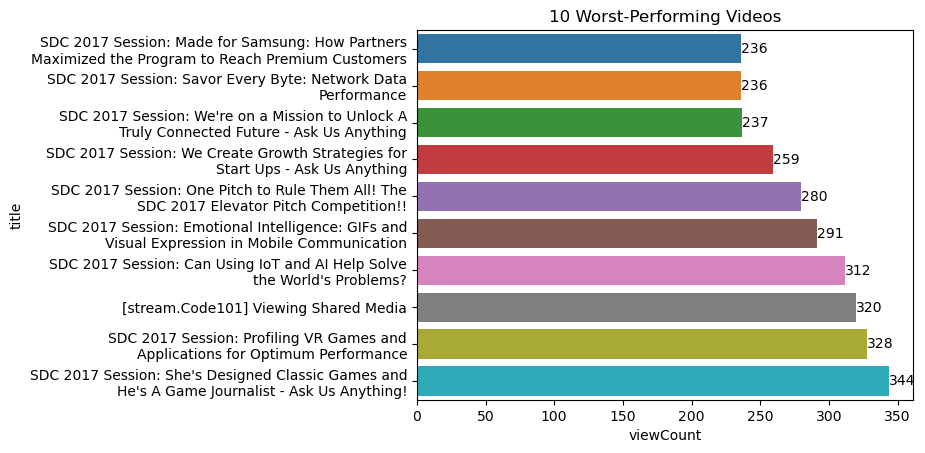

In [21]:
top_videos('10 Worst-Performing Videos')

The worst-performing video on the channel is *SDC 2017 Session: Made for Samsung: How Partners Maximized the Program to Reach Premium Customers* with only 236 views.

채널에 가장 뷰가 적은 동영상은 조회수 236회인 *SDC 2017 Session: Made for Samsung: How Partners Maximized the Program to Reach Premium Customers*입니다.

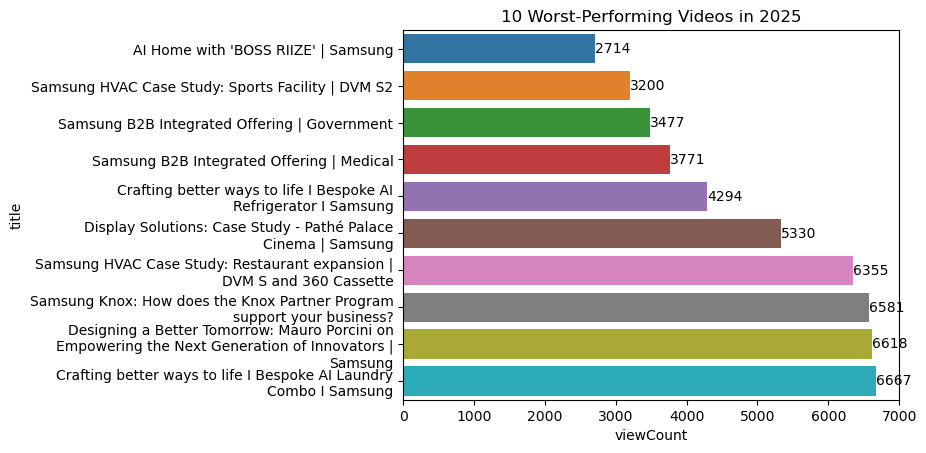

In [22]:
top_videos('10 Worst-Performing Videos in 2025', year=2025)

The least viewed video in 2025 is *AI Home with 'BOSS RIIZE'* with 2,714 views.

2025년 기준 조회수가 가장 낮은 동영상은 *AI Home with 'BOSS RIIZE*로, 조회수는 2,714회입니다.

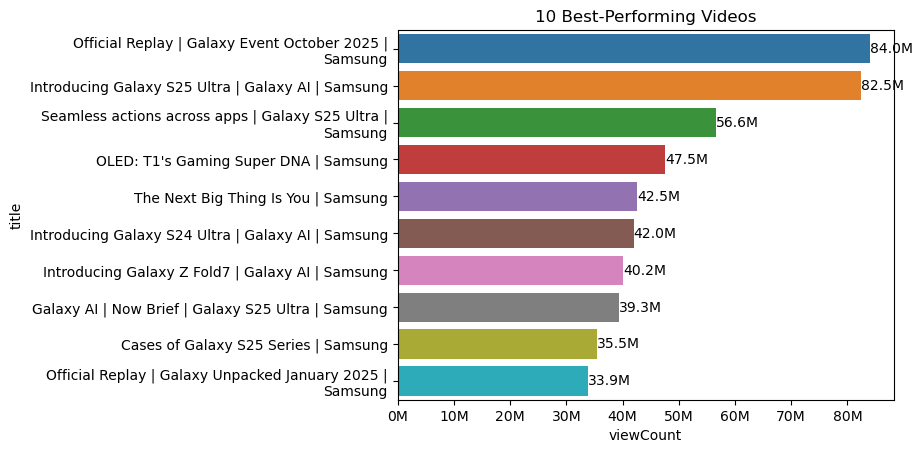

In [23]:
top_videos('10 Best-Performing Videos', ascending=False)

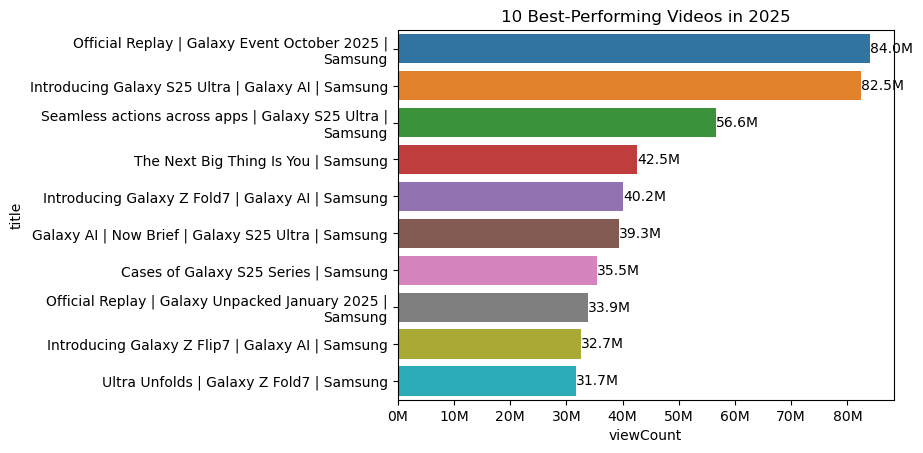

In [24]:
top_videos('10 Best-Performing Videos in 2025', ascending=False, year=2025)

The best-performing video on the channel is *Official Replay | Galaxy Event October 2025 | Samsung*, which gained 84 million views.

가장 조회수가 높은 동영상은 *Official Replay | Galaxy Event October 2025 | Samsung*으로, 조회수는 8,400만 회입니다.

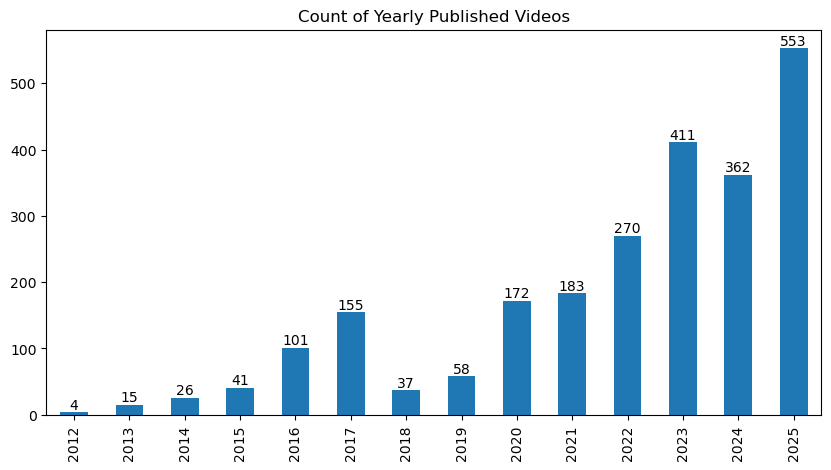

In [25]:
#yearly video count / 연도별 동영상 수
plt.figure(figsize=(10,5))
plt.title('Count of Yearly Published Videos')
ax = df.groupby(df['publishedAt'].dt.year.sort_values(ascending=False))['video_id'].count().plot.bar()
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('')
plt.show()

After the slump in 2018-2019, the number of videos published yearly has been showing an increasing trend, with 2025 being the year with the biggest number of published videos.

2018~2019년의 침체 이후, 연간 업로드된 동영상 수는 증가 추세를 보이고 있으며, 2025년이 가장 많은 동영상이 게시된 해입니다.

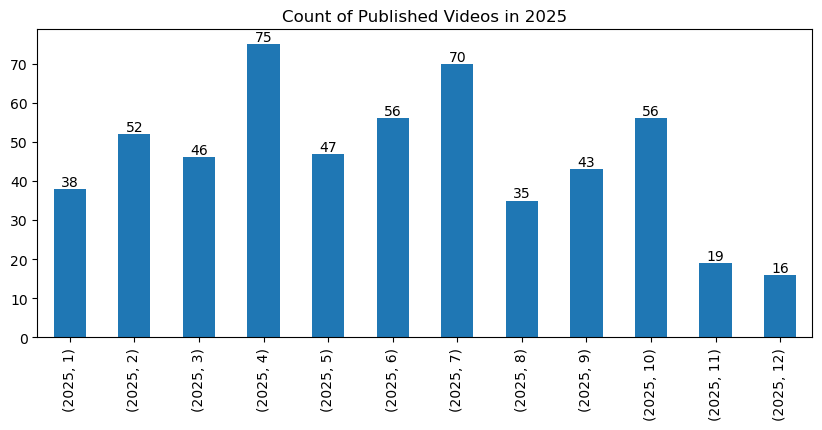

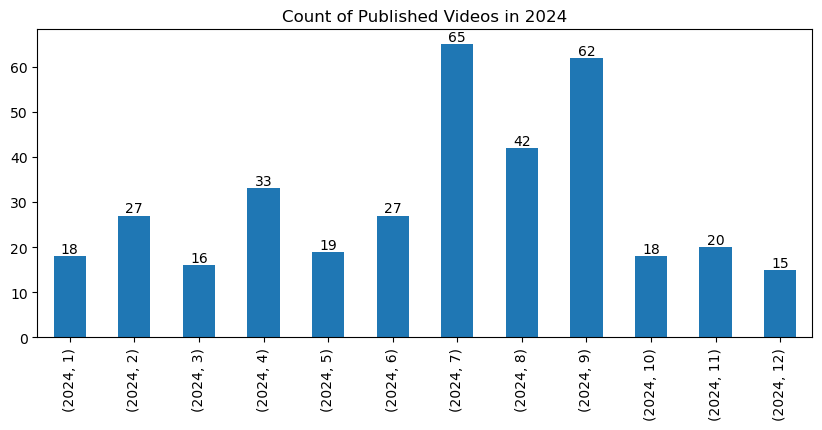

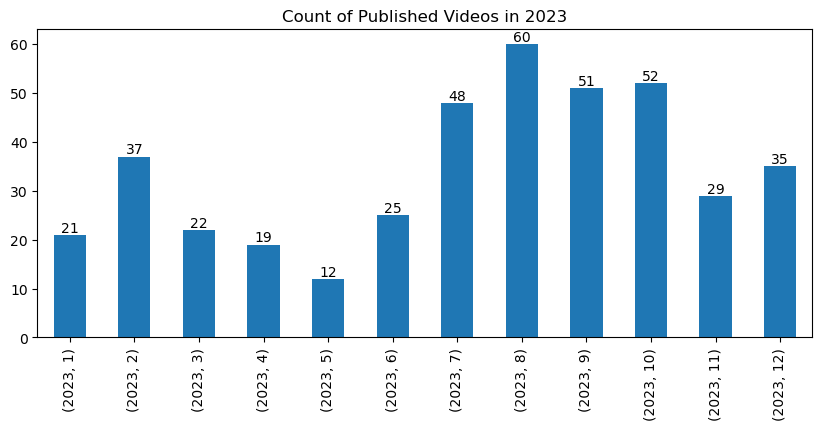

In [26]:
#published videos in the last 3 years / 최근 3년간 업로드된 동영상 수
for i in df['publishedAt'].dt.year.unique()[:3]:
    plt.figure(figsize=(10,4))
    plt.title(f'Count of Published Videos in {i}')
    ax = df[df['publishedAt'].dt.year == i].sort_values(['publishedAt'], ascending=True).groupby([df['publishedAt'].dt.year, df['publishedAt'].dt.month])['video_id'].count().plot.bar()
    for container in ax.containers:
        ax.bar_label(container)
    plt.xlabel('')
    plt.savefig(f'Count of Published Videos in {i}', bbox_inches='tight')
    plt.show()

While in 2023 and 2024 more videos were published in 2H of the year, in 2025 more videos were published in 1H.

2023년과 2024년에는 하반기에 더 많은 동영상이 업로드되었으나, 2025년에는 상반기에 더 많은 동영상이 게시되었습니다.

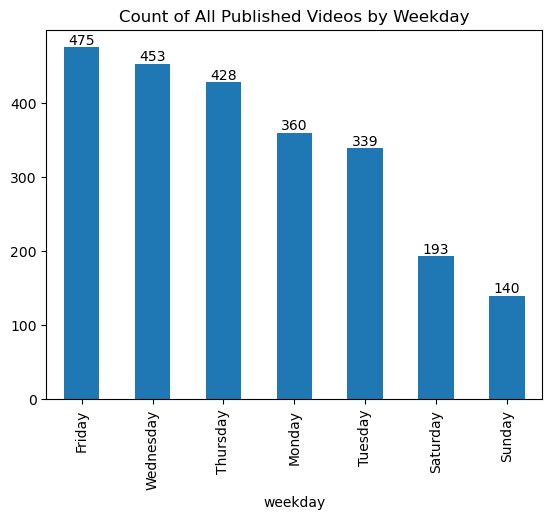

In [35]:
#published videos by weekday / 요일별 동영상 수
plt.title('Count of All Published Videos by Weekday')
ax = df.groupby('weekday')['video_id'].count().sort_values(ascending=False).plot.bar()
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Historically, most of the videos were published on Friday and least - on Sunday.

역사적으로 대부분의 동영상은 금요일에 게시되었고, 가장 적게 게시된 요일은 일요일입니다.

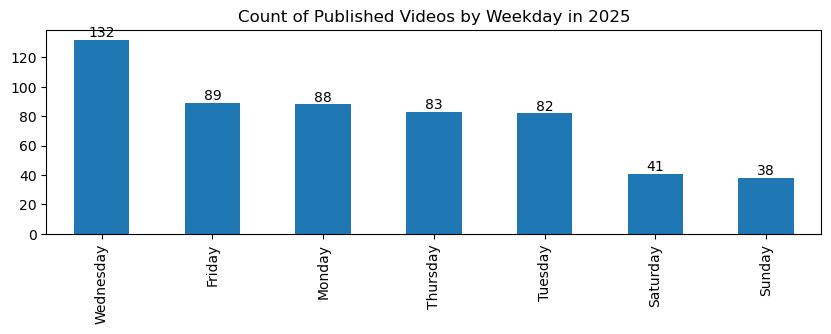

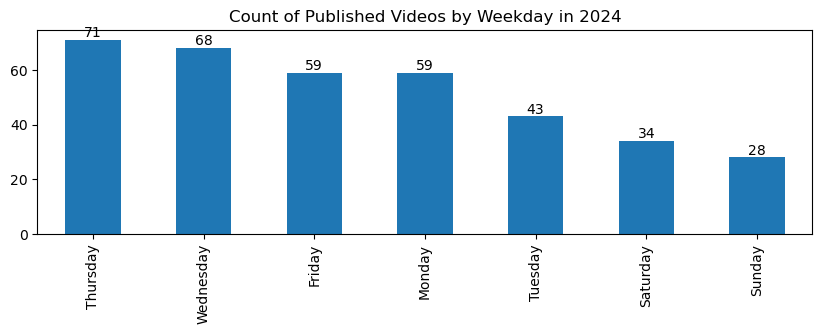

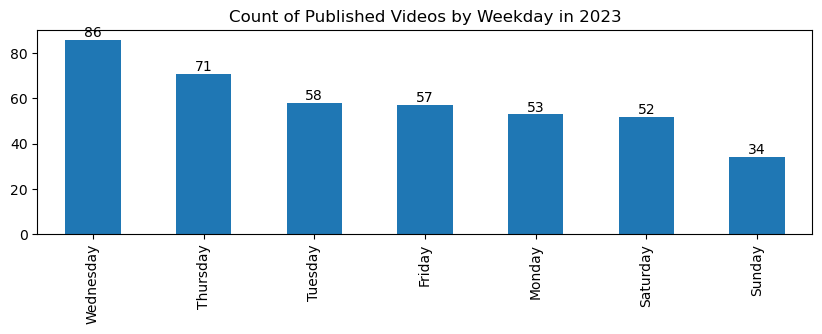

In [28]:
#video publish days by year in the last 3 years / 최근 3년간 연도별 동영상 게시 요일입

for i in df['publishedAt'].dt.year.unique()[:3]:
    plt.figure(figsize=(10,9))
    plt.subplot(3, 1, i-2022)
    plt.title(f'Count of Published Videos by Weekday in {i}')
    ax = df[df['publishedAt'].dt.year == i].groupby('weekday')['video_id'].count().sort_values(ascending=False).plot.bar()
    for container in ax.containers:
        ax.bar_label(container)
    plt.xlabel('')
    plt.savefig(f'Count of Published Videos by Weekday in {i}', bbox_inches='tight')
    plt.show()

The fewest number of videos were published on weekends. Wednesday, Thursday, and Friday look like quite popular days for uploading content on the channel.

주말에는 동영상 게시 수가 가장 적었습니다. 수요일, 목요일, 금요일은 채널에서 콘텐츠를 업로드하기에 비교적 인기 있는 날로 보입니다.

# Word Cloud

In [29]:
#preparing data for building word cloud / 워드클라우드 생성을 위해 데이터를 준비
titles = ' '.join(df['title'])
tags_cloud = ' '.join(df['tags']).replace("'","").replace(",","")
description_cloud = ' '.join(df['description']).replace("'","").replace("#","")

In [30]:
#setting stopwords / 불용어를 설정
stop_words = set(stopwords.words('english'))
stop_words = ['samsung', 'tag', 'description', '|', '-'] + list(stop_words)

In [31]:
#defining formula for creating a word cloud / 워드클라우드 생성 위한 함수 정의
def wc_viz(data, title, words=5):
    data = ' '.join(word for word in data.split() if word.lower() not in stop_words)
    #generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(data)
    #plot
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.savefig(title, bbox_inches='tight')
    plt.show()
    
    #get 5 most frequent words
    words = Counter(data.split()).most_common(words)
    words = pd.DataFrame(words, columns=['Word', 'Count'])
    display(words)

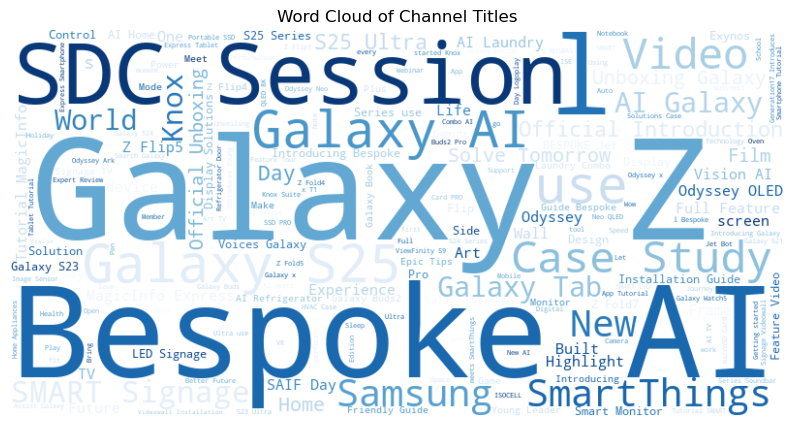

,Word,Count
0,Galaxy,627
1,AI,320
2,Bespoke,147
3,Z,129
4,use,113


In [32]:
wc_viz(titles, 'Word Cloud of Channel Titles')

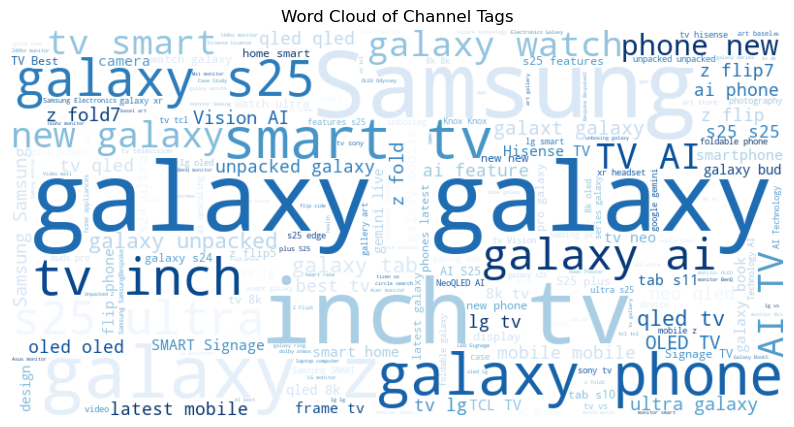

,Word,Count
0,galaxy,2663
1,tv,1636
2,TV,755
3,ai,704
4,z,670


In [33]:
wc_viz(tags_cloud, 'Word Cloud of Channel Tags')

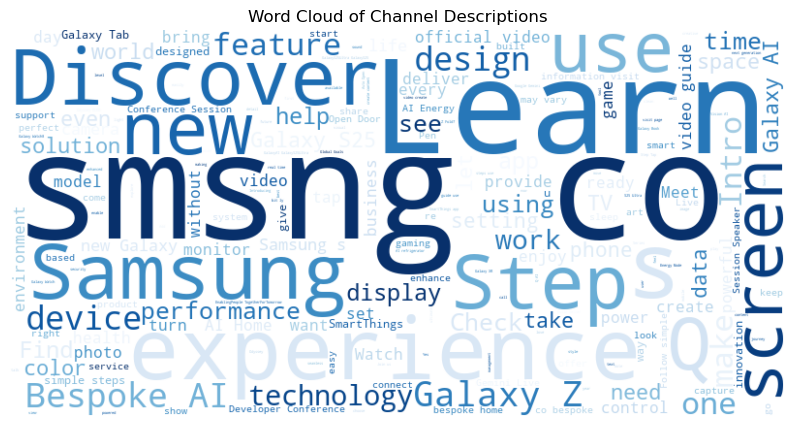

,Word,Count
0,Galaxy,1373
1,Learn,1000
2,AI,990
3,more:,937
4,new,548


In [34]:
wc_viz(description_cloud, 'Word Cloud of Channel Descriptions')

# Summary and Conslusions / 요약 및 결론

- Most of the videos on the channel less than approximately 150 seconds long.
<br> 채널의 대부분 동영상은 약 150초 미만입니다.

- The worst-performing video on the channel is *SDC 2017 Session: Made for Samsung: How Partners Maximized the Program to Reach Premium Customers* with only 236 views.
<br>채널에서 가장 성과가 낮은 동영상은 조회수 236회인 *SDC 2017 Session: Made for Samsung: How Partners Maximized the Program to Reach Premium Customers*입니다.

- The best-performing video on the channel is *Official Replay | Galaxy Event October 2025 | Samsung*, which gained 84 million views.
<br> 채널에서 가장 성과가 높은 동영상은 *Official Replay | Galaxy Event October 2025 | Samsung으로, 조회수는 8,400*만 회입니다.

- After the slump in 2018-2019, the number of videos published yearly has been showing an increasing trend, with 2025 being the year with the biggest number of published videos.
<br> 2018~2019년의 침체 이후, 연간 게시된 동영상 수는 증가 추세를 보이고 있으며, 2025년이 가장 많은 동영상이 게시된 해입니다.

- The least number of videos were published on weekends. Wednesday, Thursday and Friday look like quite popular days for uploading content on the channel.
<br> 주말에는 동영상 게시 수가 가장 적었습니다. 수요일, 목요일, 금요일은 채널에서 콘텐츠를 업로드하기에 비교적 인기 있는 날로 보입니다.

- There is a strong correlation (0.91) between like and comment count. So, the more likes the video has, the more comments are left below it and vice versa.
<br> 좋아요 수와 댓글 수 사이에는 강한 상관관계(0.91)가 있습니다. 즉, 동영상의 좋아요 수가 많을수록 댓글도 많이 달리며, 그 반대도 마찬가지입니다.

- The words *Galaxy* and *AI* are most often used in video titles, tags and descriptions.
<br> 동영상 제목, 태그, 설명에서 Galaxy와 AI라는 단어가 가장 자주 사용됩니다.